In [31]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def load_dataset():
    #two matrices first holds our data second our labels
    dataMat = []
    labelMat = []
    fr = open('Data/testSet.txt')
    for line in fr:
        lineArr = line.strip().split()
        #our data matrice has the first column composed of ones second and third one are the features from testSet
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [37]:
def sigmoid(Z):
    #sigmoid function
    return(1.0/(1+np.exp(-Z)))

In [41]:
def grad_ascent(dataMat,labelMat):
    dataMatrix = np.mat(dataMat)
    labelMatrix = np.mat(labelMat).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMatrix -h)
        weights = weights + (alpha*dataMatrix.transpose()*error)
    return weights
    

In [50]:
datamat,labelmat = load_dataset()


In [43]:
w = grad_ascent(datamat,labelmat)

In [46]:
w.getA()

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

In [59]:
def plot_decision_boundary(w):
    #given weights we plot the decision boundary separating two classes or more
    weights = w.getA()
    dataMat,labelMat = load_dataset()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcoord1 = []
    xcoord2 = []
    ycoord1 = []
    ycoord2 = []
    for i in range(n) :
        if(int(labelMat[i]) == 1):
            xcoord1.append(dataArr[i,1])
            ycoord1.append(dataArr[1,2])
        else:
            xcoord2.append(dataArr[i,1])
            ycoord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcoord1,ycoord1,s=30,c="red",marker = 's')
    ax.scatter(xcoord2,ycoord2,s=30,c="blue")
    x = np.arange(-3.0,3.0,0.1)
    y = (-weights[0] - weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    

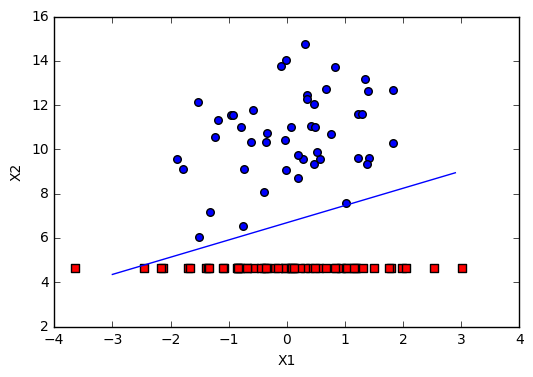

In [60]:
%matplotlib inline
plot_decision_boundary(w)